In [28]:
import pandas as pd
import yfinance as yf
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [29]:

# Get the list of S&P 500 constituents
sp500_tickers = pd.read_excel(
    "https://www.ssga.com/us/en/intermediary/etfs/library-content/products/fund-data/etfs/us/holdings-daily-us-en-spy.xlsx",
    header=4).Ticker.dropna().to_list()

# Retrieve historical data
df = yf.download(sp500_tickers, period='10y')
sp500 = df['Adj Close'].dropna(how='all', axis=1)


[*********************100%%**********************]  504 of 504 completed


3 Failed downloads:
['BRK.B', '-']: Exception('%ticker%: No data found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (period=10y)')


In [30]:
sp500.tail(1) #Adjusted Close

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-19 00:00:00,139.789993,14.3,196.940002,153.600006,146.910004,108.419998,74.830002,341.51001,604.640015,197.830002,...,91.720001,62.119999,102.989998,34.73,111.580002,130.240005,119.970001,269.420013,43.93,198.080002


In [56]:
# Define the time period and lag, can be changed to any number and code will work
time_period = 1260  # 5 years
lag = 20 # lag of 20 days


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-16,62.657406,36.165215,46.438053,72.467529,NaN,66.243797,28.260000,153.835846,238.889999,80.939774,...,101.932137,44.345531,61.140465,35.328091,66.670029,80.909370,109.388023,180.699997,41.029453,89.068138
2018-11-19,60.362835,35.250008,44.597603,70.844467,NaN,64.864494,28.250000,151.756714,219.690002,77.357750,...,98.583595,44.831890,61.341801,35.062176,65.334175,80.217628,106.070396,169.410004,41.088757,87.092361
2018-11-20,65.096619,35.023670,42.466831,69.743950,NaN,63.503578,27.920000,148.148575,219.729996,80.523697,...,96.182587,44.996906,59.599567,35.062176,63.236351,79.361992,105.042404,162.289993,40.139904,85.458801
2018-11-21,65.289429,35.732216,42.418846,68.207985,NaN,63.016235,28.000000,146.358444,225.979996,81.120697,...,100.736847,44.076294,60.056423,35.033676,64.224113,79.216370,105.313408,164.339996,39.911160,85.719772
2018-11-23,65.761818,37.346115,41.341454,67.796288,NaN,62.629997,28.000000,146.311859,225.559998,80.179955,...,99.402977,44.171833,58.453575,34.672806,63.988934,79.691643,105.322754,165.000000,39.834904,86.261063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14,111.610001,12.250000,187.440002,138.059998,126.680000,97.080002,85.500000,320.489990,604.330017,176.747208,...,86.866920,60.299999,104.290001,28.940001,100.869865,126.929611,108.070000,215.660004,35.369999,172.649994
2023-11-15,113.599998,12.420000,188.009995,137.600006,128.350006,98.000000,82.660004,325.500000,595.309998,179.932190,...,87.205933,60.090000,103.660004,29.320000,99.913002,126.023903,110.500000,216.960007,36.080002,174.619995
2023-11-16,114.190002,12.190000,189.710007,138.279999,126.279999,100.260002,83.709999,327.320007,602.059998,178.996597,...,85.809998,60.700001,102.459999,29.600000,100.929672,127.228203,111.550003,215.479996,35.709999,176.539993


In [32]:
#how_many_days_back = 0 for current, 1260 for 5 years. It's for backtesting.

def calculate_momentum_factors(how_many_days_back):
# Define the start and end points for the data slice
    start_time = how_many_days_back+ time_period + lag # start at start_time, increase by time_period, include lag
    most_current_time = how_many_days_back+ lag # only difference is the time_period is not included, so we get slice of time period exactly
    
    lagged_closed_price = sp500[-start_time: -most_current_time ] #slice the dataframe to get 5 years
    rolling_mean_price = lagged_closed_price.rolling(window= time_period-251).mean().dropna(how='all') # get the rolling mean price window for 1 year

    # Calculate the 52-week trend
    slope_info = pd.DataFrame(index=sp500.columns)
    for i in range(1, lag + 1): 
        slope_info[i] = rolling_mean_price.apply(
            lambda x: np.polyfit(
                np.arange(len(x[-i - 252: -i])),
                                  x[-i - 252: -i], 1)[0] if x[-i - 252: -i].notna().all() else np.nan) 
    
    _52_week_trend = slope_info.mean(axis=1) 


    # x - x.min() / x.min() * 100 where x is the adjusted close price of our 500 stocks during the stored slice of time period
    percent_above_260 = (lagged_closed_price - lagged_closed_price.rolling(window=260).min()) / lagged_closed_price.rolling(window=260).min() * 100
    percent_above_260 = percent_above_260.dropna(how='all').mean()

    # Rolling 4 week mean - rolling 52 week mean / rolling 52 week mean * 100
    oscillator = (lagged_closed_price.rolling(window=4*5).mean() - lagged_closed_price.rolling(window=52*5).mean()) / lagged_closed_price.rolling(window=52*5).mean() * 100
    oscillator = oscillator.dropna(how='all').mean()    

    # percent change of the adjusted close price over 39 weeks
    returns_39w = lagged_closed_price.pct_change(periods= 39 * 5).dropna(how='all').mean() 
    

    # 51 week Volume Price Trend
    volume = df['Volume'].dropna(how='all', axis=1)[-lag - time_period: -lag]
    vpt = (volume * lagged_closed_price.pct_change()).cumsum() # volume price trend is the cumulative sum of volume * pct_change 
    vpt_51w = (vpt - vpt.shift(periods=51 * 5)).dropna(how='all').mean()
    # the shift is used to shift the df by 51 weeks so that we can calculate the difference between the current and prior 51 week period 
    

    # Creating the DataFrame
    new_table = pd.DataFrame(index=sp500.transpose().index)
    new_table['Slope 52 Week Trend-Line'] = _52_week_trend
    new_table['Percent above 260 Day Low'] = percent_above_260
    new_table['4/52 Week Oscillator'] = oscillator
    new_table['39_Week_Return'] = returns_39w
    new_table['51 Week Volume Price Trend'] = vpt_51w
    return new_table

## Momentum factors (5 years prior to current date) (20 day lag)
### Aggregate factors with z-score calculation. Z-scores will determine the long basket and short basket.

In [33]:
momentum_factors = calculate_momentum_factors(0)
momentum_factors

,Slope 52 Week Trend-Line,Percent above 260 Day Low,4/52 Week Oscillator,39_Week_Return,51 Week Volume Price Trend
A,0.058054,38.298122,7.010244,0.135462,5.919131e+04
AAL,-0.016227,44.097246,-6.985574,-0.051256,9.198440e+07
AAPL,0.120834,60.480599,15.864110,0.315704,3.205079e+07
ABBV,0.082561,40.342549,10.672054,0.176006,-1.382077e+06
ABNB,NaN,32.635749,-6.130659,-0.047640,1.301536e+06
...,...,...,...,...,...
YUM,0.034509,36.486743,3.349490,0.079771,3.913849e+04
ZBH,0.013743,34.864186,0.541547,0.040844,-5.304695e+04
ZBRA,0.084186,57.779057,4.757957,0.148861,-1.082096e+05
ZION,-0.004966,52.703088,-0.772815,0.031850,-1.390435e+06


In [57]:
def calculate_z_scores(x): # where x is equal to momentum_factors
    z_scores = (x - x.mean()) / x.std() # standard z score formula
    z_scores = z_scores.sum(axis=1) # summing the z-scores of each factor to get the total z-score per asset
    # The z-score is the number of standard deviations away from the mean a data point is.
    return z_scores.sort_values(ascending=False) # sorts the z-scores in descending order

long_basket = calculate_z_scores(momentum_factors)[:10] # selects the top 10 z-scores
short_basket = calculate_z_scores(momentum_factors)[-10:] # selects the bottom 10 z-scores

print("Long Basket:")
print(long_basket)
print("Short Basket:")
print(short_basket)

def get_lagged_closed_price(how_many_days_back):
    start_time = how_many_days_back+ time_period + lag # start at start_time, increase by time_period, include lag
    most_current_time = how_many_days_back+ lag # only difference is the time_period is not included, so we get slice of time period exactly
    # Calculate the rolling mean price
    lagged_closed_price = sp500[-start_time: -most_current_time ]
    return lagged_closed_price

lagged_closed_price = get_lagged_closed_price(0)
# Filter lagged_closed_price based on long_basket and short_basket indices
long_lagged_closed_price = lagged_closed_price[long_basket.index]
short_lagged_closed_price = lagged_closed_price[short_basket.index]

Long Basket:
TSLA    41.828165
MRNA    20.022725
ENPH    18.780363
NVDA    16.411006
NVR     15.538851
AZO      9.834504
BLDR     9.779092
CMG      9.515737
AMD      9.436775
FCX      8.319723
dtype: float64
Short Basket:
VZ     -5.238646
BXP    -5.328869
INTC   -5.361759
PARA   -5.375967
WBA    -5.376373
WBD    -5.816667
BAX    -5.992664
FIS    -6.180746
VTRS   -6.410173
VFC    -7.559778
dtype: float64


## Back-Test

In [59]:
# First get the momentum factors
momentum_factors_past_5y = calculate_momentum_factors(1260) # 5 years
# Then get the z-scores
long_basket_past_5y = calculate_z_scores(momentum_factors_past_5y)[:10] # selects the top 10 z-scores
short_basket_past_5y =  calculate_z_scores(momentum_factors_past_5y)[-10:] # selects the top 10 z-scores


print("Long Basket Past 5 Years:")
print (long_basket_past_5y)
print("Short Basket Past 5 Years:")
print(short_basket_past_5y)


lagged_closed_price_past_5y = get_lagged_closed_price(1260)
# Filter lagged_closed_price based on long_basket and short_basket indices
long_lagged_closed_price_past_5y = get_lagged_closed_price(1260)[long_basket_past_5y.index]
short_lagged_closed_price_past_5y = get_lagged_closed_price(1260)[short_basket_past_5y.index]


Long Basket Past 5 Years:
NVR     19.796520
NVDA    17.629935
AMD     14.650173
CZR     13.971369
ETSY    12.269550
NFLX    11.912696
PAYC    11.207563
ALGN    11.181259
TTWO     8.398806
AXON     8.217139
dtype: float64
Short Basket Past 5 Years:
WBD   -4.988579
F     -4.999714
MCK   -5.118068
HWM   -5.171050
BEN   -5.251841
SLB   -5.438205
APA   -5.621970
CMG   -5.895641
GE    -6.302865
EQT   -6.472635
dtype: float64


/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_2267/1934111999.py:32: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_39w = lagged_closed_price.pct_change(periods= 39 * 5).dropna(how='all').mean()
/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_2267/1934111999.py:37: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  vpt = (volume * lagged_closed_price.pct_change()).cumsum() # volume price trend is the cumulative sum of volume * pct_change


## Cumulative Returns

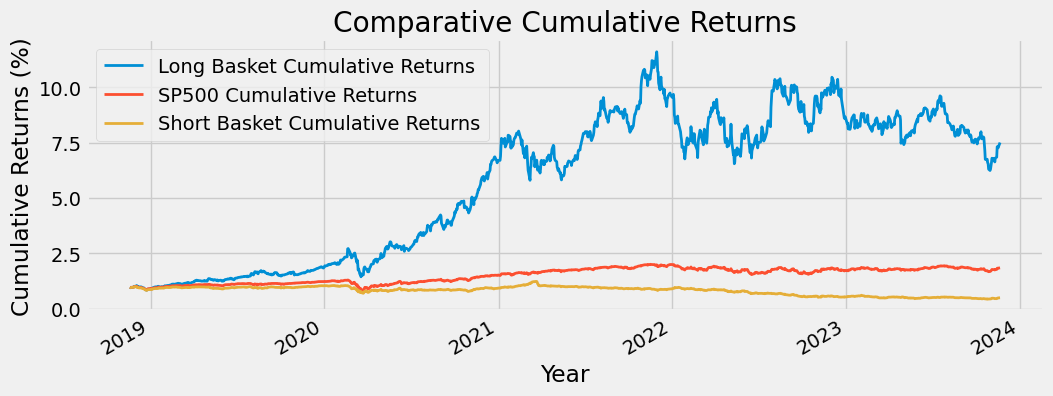

In [60]:
def calculate_cumulative_returns(dataf): 
    returns = dataf.pct_change()
    cumulative_returns = (1 + returns).cumprod().mean(axis=1) 
    return cumulative_returns

# Calculate the cumulative returns for the SP500, long basket, and short basket
cumulative_returns = calculate_cumulative_returns(lagged_closed_price)
long_cumulative_returns = calculate_cumulative_returns(long_lagged_closed_price)
short_cumulative_returns = calculate_cumulative_returns(short_lagged_closed_price)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
long_cumulative_returns.plot(label='Long Basket Cumulative Returns', lw=2) # lw is line width
cumulative_returns.plot(label='SP500 Cumulative Returns', lw =2)
short_cumulative_returns.plot(label='Short Basket Cumulative Returns', lw=2)

plt.legend()
plt.title('Comparative Cumulative Returns')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()

/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_2267/3017037697.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = dataf.pct_change()


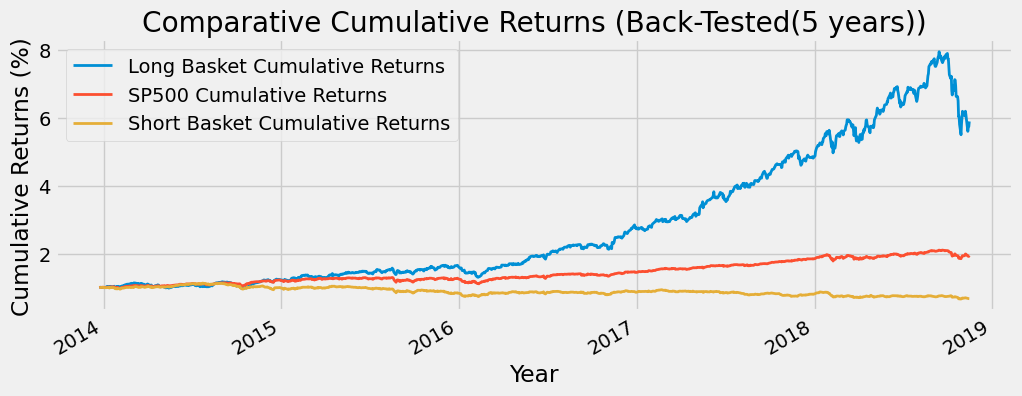

In [37]:
# Calculate the cumulative returns for the SP500, long basket, and short basket
cumulative_returns_past_5y = calculate_cumulative_returns(lagged_closed_price_past_5y)
long_cumulative_returns_past_5y = calculate_cumulative_returns(long_lagged_closed_price_past_5y)
short_cumulative_returns_past_5y = calculate_cumulative_returns(short_lagged_closed_price_past_5y)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(11,4))
long_cumulative_returns_past_5y.plot(label='Long Basket Cumulative Returns', lw=2) # lw is line width
cumulative_returns_past_5y.plot(label='SP500 Cumulative Returns', lw =2)
short_cumulative_returns_past_5y.plot(label='Short Basket Cumulative Returns', lw=2)

plt.legend()
plt.title('Comparative Cumulative Returns (Back-Tested(5 years))')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns (%)')
plt.show()

## Monthly Long basket return bar chart (pos/neg coloring) vs SP500
## Need to fix time on x tickers.

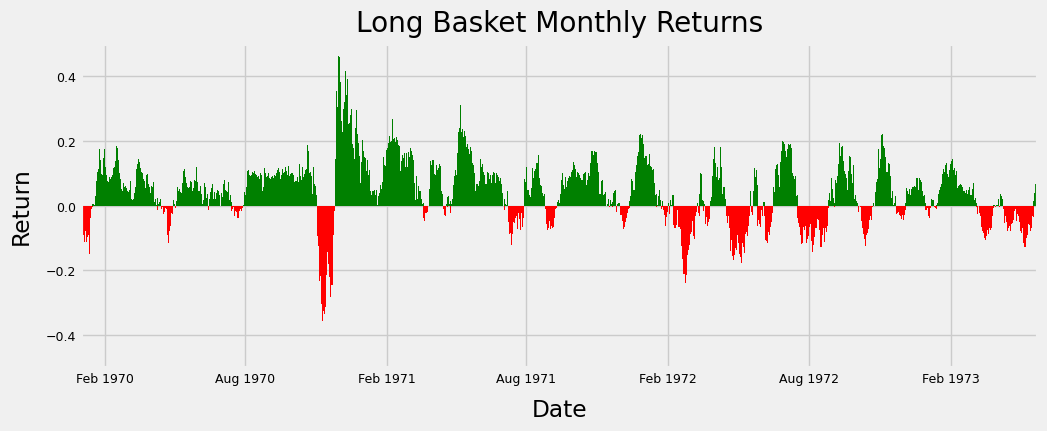

In [61]:

# Calculate 20-day returns, take the mean, drop NaNs, and plot
plt.style.use('fivethirtyeight')
long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(# 20-day returns plot
    kind='bar', # bar plot
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in long_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.tick_params(axis='both', labelsize=9) # tick label size
plt.xticks(rotation=0) 
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5) 
plt.ylabel('Return',labelpad=9) # adjust the label position
plt.xlabel('Date',labelpad=9) # adjust the label position
plt.title('Long Basket Monthly Returns',pad=9) # adjust the title position
plt.show()
plt.show()

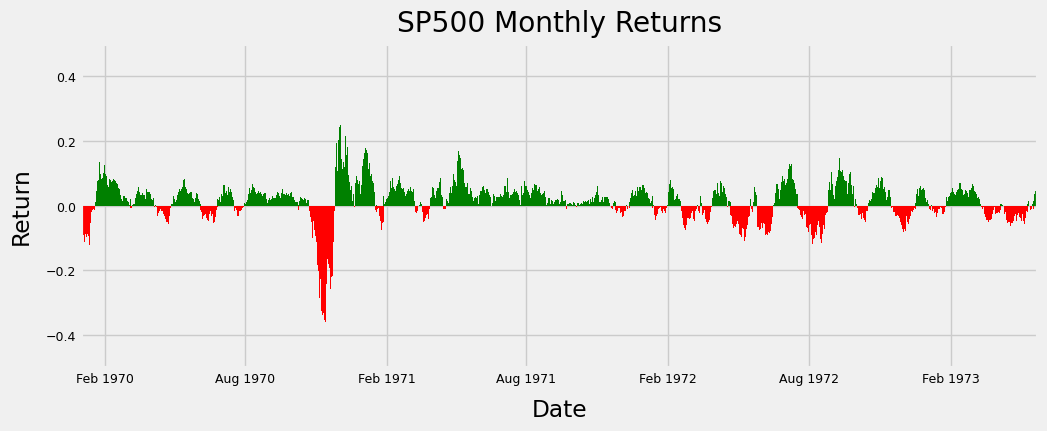

In [39]:

plt.style.use('fivethirtyeight')
lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.tick_params(axis='both', labelsize=9)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5) # keeping the same y-axis limits as the original plot
plt.ylabel('Return',labelpad=9)
plt.xlabel('Date',labelpad=9)
plt.title('SP500 Monthly Returns',pad=9)
plt.show()

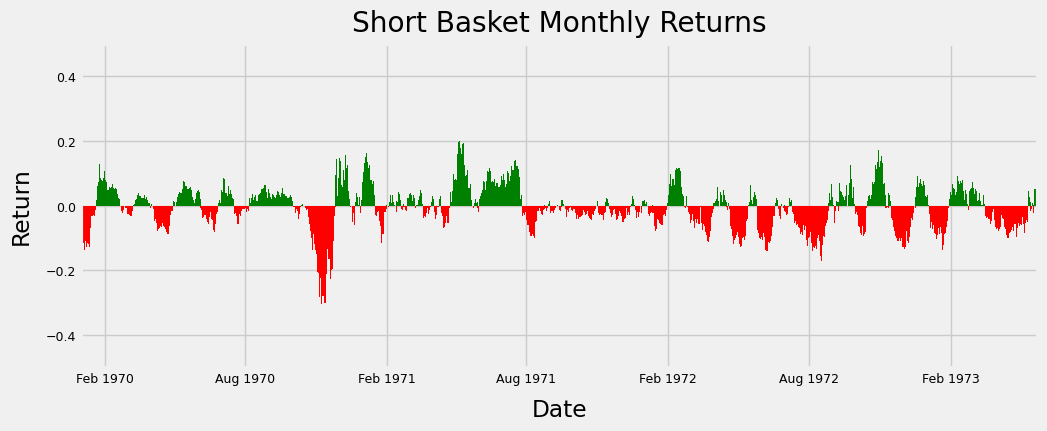

In [40]:
plt.style.use('fivethirtyeight')
short_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all').plot(
    kind='bar', 
    figsize=(11,4), 
    color=['r' if m < 0 else 'g' for m in short_lagged_closed_price.pct_change(20).mean(axis=1).dropna(how='all')], 
    legend=False, 
    width=1.3
)

plt.tick_params(axis='both', labelsize=9)
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # Date format messes up when using the bar plot
plt.ylim(-0.5, 0.5)
plt.ylabel('Return',labelpad=9)
plt.xlabel('Date',labelpad=9)
plt.title('Short Basket Monthly Returns',pad=9)
plt.show()
plt.show()




## Monthly return for long picks vs short picks vs SP500

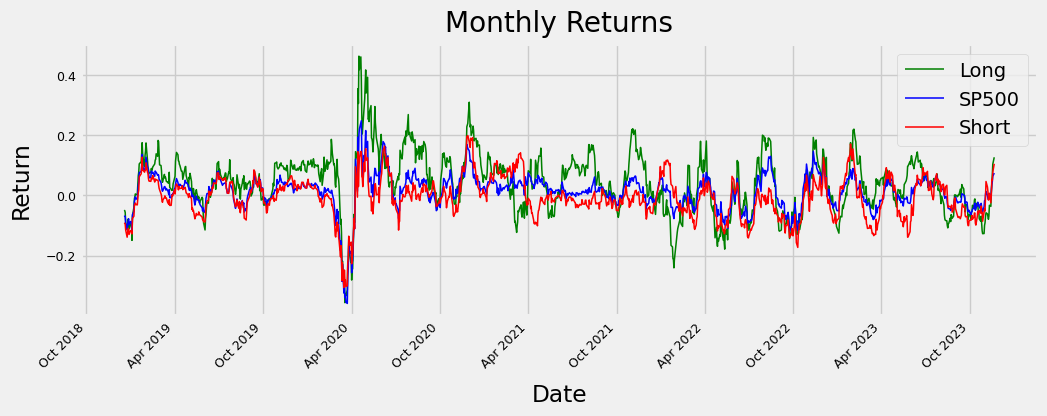

In [41]:
# monthly returns 

monthly_graph = pd.DataFrame()
plt.style.use('fivethirtyeight')
long_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'Long', color = 'green', lw=1.1)
lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4), label = 'SP500', color ='blue', lw = 1.1)
short_lagged_closed_price.pct_change(20).dropna(how='all').mean(axis=1).plot(figsize=(11,4),label= 'Short', color = 'red', lw=1.1)
plt.legend()
# Set x-ticks to be months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y',))
plt.xticks(rotation=45)
plt.tick_params(axis='both', labelsize=9)
plt.ylabel('Return',labelpad=9)
plt.xlabel('Date',labelpad=9)
plt.title('Monthly Returns',pad=9)
plt.show()




# Extra Credit : Portfolio weights
## Imported class from Efficient Frontier 

In [42]:
%%capture 
# ^ this is used to suppress the output of the cell
import sys

# Add the directory containing the module to the Python path
sys.path.insert(0, '/Users/jcarlito/Documents/GitHub/Quantative-Finance-Repo/Finished_workbooks/EF')

from Efficient_Frontier import EfficientFrontier

In [43]:
ef = EfficientFrontier(sp500[long_basket.index])
ef.calculate_portfolio() #Printing Annual Returns


TSLA    1.480802
MRNA    1.582353
ENPH    1.639754
NVDA    1.592800
NVR     1.239838
AZO     1.203585
BLDR    1.446548
CMG     1.205503
AMD     1.525413
FCX     1.174889
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


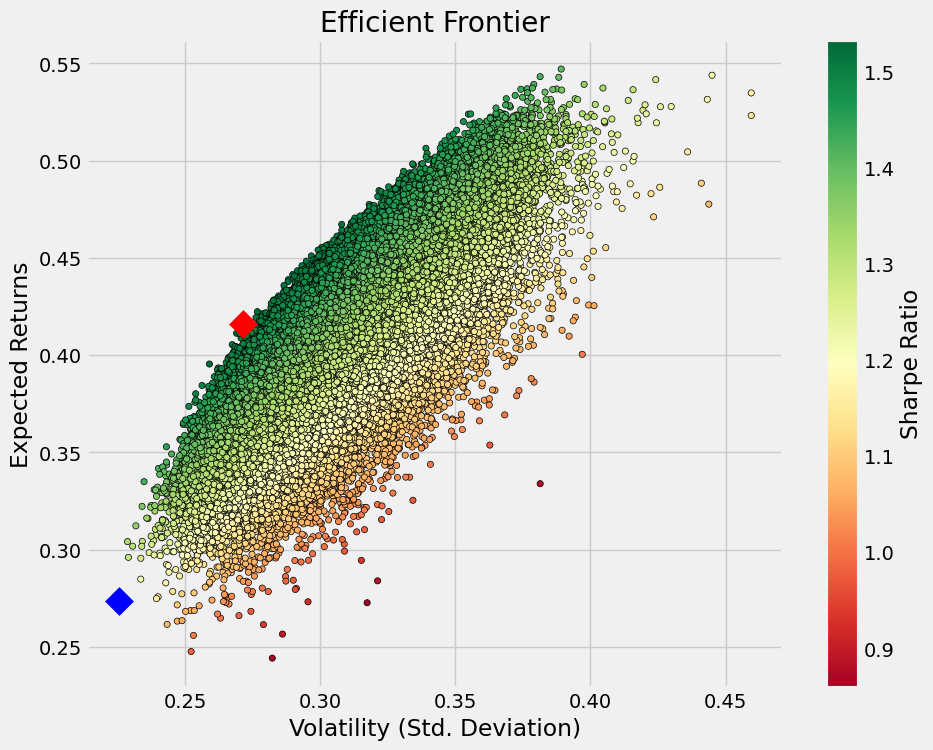

In [44]:
ef.plot_frontier()

In [45]:
ef.get_optimal_portfolio()

              Minimum Risk Adjusted Values  Max Risk Adjusted Values
Returns                           0.273319                  0.416209
Volatility                        0.225341                  0.271444
Sharpe Ratio                      1.212915                  1.533315
TSLA Weight                       0.007417                  0.075785
MRNA Weight                       0.041868                  0.111688
ENPH Weight                       0.001955                  0.081093
NVDA Weight                       0.045121                  0.221835
NVR Weight                        0.273706                  0.141106
AZO Weight                        0.272002                  0.216795
BLDR Weight                       0.038970                  0.078451
CMG Weight                        0.193547                  0.061169
AMD Weight                        0.049188                  0.010421
FCX Weight                        0.076225                  0.001657
